<a href="https://colab.research.google.com/github/teja-1403/Game-of-Thrones-Analysis/blob/main/GOT_Battles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Game-of-Thrones-Battles-Analysis**

# **1. DATASET OVERVIEW**

In [143]:
# Loading required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
from google.colab import files

# Upload files
uploaded = files.upload()

Saving battles.csv to battles (1).csv


In [145]:
battles = pd.read_csv('battles.csv')
print(battles)

                                                 name  year  battle_number  \
0                          Battle of the Golden Tooth   298              1   
1                         Battle at the Mummer's Ford   298              2   
2                                  Battle of Riverrun   298              3   
3                            Battle of the Green Fork   298              4   
4                       Battle of the Whispering Wood   298              5   
5                                 Battle of the Camps   298              6   
6                                       Sack of Darry   298              7   
7                               Battle of Moat Cailin   299              8   
8                            Battle of Deepwood Motte   299              9   
9                           Battle of the Stony Shore   299             10   
10                         Battle of Torrhen's Square   299             11   
11                               Battle of Winterfell   299     

In [146]:
# Top 5 records of the dataset.
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [147]:
# Looking at the number of rows and columns in the dataset.
battles.shape

(38, 25)

In [148]:
# Names of all the columns.
battles.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

In [149]:
# Names of all the columns.
for i in battles.columns:
    print(i)

name
year
battle_number
attacker_king
defender_king
attacker_1
attacker_2
attacker_3
attacker_4
defender_1
defender_2
defender_3
defender_4
attacker_outcome
battle_type
major_death
major_capture
attacker_size
defender_size
attacker_commander
defender_commander
summer
location
region
note


In [150]:
# Basic stats about the dataset.
battles.describe()

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,0.0,0.0,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,NaN,NaN,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,NaN,NaN,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,NaN,NaN,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,NaN,NaN,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,NaN,NaN,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,NaN,NaN,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,NaN,NaN,1.000000,1.000000,100000.000000,20000.000000,1.000000


# **2. DATA CLEANING**

In [151]:
# Datatypes of all the columns of the dataset.
battles.dtypes

,0
name,object
year,int64
battle_number,int64
attacker_king,object
defender_king,object
attacker_1,object
attacker_2,object
attacker_3,object
attacker_4,object
defender_1,object


In [152]:
# Check all the null values in dataset.
battles.isnull()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,False,...,False,False,True,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,True,True,True,False,...,False,False,True,True,False,False,False,False,False,True
7,False,False,False,False,False,False,True,True,True,False,...,False,False,True,True,False,True,False,False,False,True
8,False,False,False,False,False,False,True,True,True,False,...,False,False,False,True,False,True,False,False,False,True
9,False,False,False,False,False,False,True,True,True,False,...,False,False,False,True,False,True,False,False,False,False


In [153]:
# Sum all the null values in the dataset.
battles.isnull().sum()

,0
name,0
year,0
battle_number,0
attacker_king,2
defender_king,3
attacker_1,0
attacker_2,28
attacker_3,35
attacker_4,36
defender_1,1


In [154]:
# Create a new dataset with the selected columns required for the data analysis.
battles=battles[['name','attacker_king','defender_king','attacker_outcome','battle_type','major_death','major_capture','attacker_size','defender_size','attacker_commander','defender_commander','location','region']]
battles

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
0,Battle of the Golden Tooth,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",Golden Tooth,The Westerlands
1,Battle at the Mummer's Ford,Joffrey/Tommen Baratheon,Robb Stark,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,Mummer's Ford,The Riverlands
2,Battle of Riverrun,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",Riverrun,The Riverlands
3,Battle of the Green Fork,Robb Stark,Joffrey/Tommen Baratheon,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",Green Fork,The Riverlands
4,Battle of the Whispering Wood,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,Whispering Wood,The Riverlands
5,Battle of the Camps,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",Riverrun,The Riverlands
6,Sack of Darry,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,Darry,The Riverlands
7,Battle of Moat Cailin,Balon/Euron Greyjoy,Robb Stark,win,pitched battle,0.0,0.0,NaN,NaN,Victarion Greyjoy,NaN,Moat Cailin,The North
8,Battle of Deepwood Motte,Balon/Euron Greyjoy,Robb Stark,win,siege,0.0,0.0,1000.0,NaN,Asha Greyjoy,NaN,Deepwood Motte,The North
9,Battle of the Stony Shore,Balon/Euron Greyjoy,Robb Stark,win,ambush,0.0,0.0,264.0,NaN,Theon Greyjoy,NaN,Stony Shore,The North


In [155]:
# Number of rows and number of columns.
battles.shape

(38, 13)

In [156]:
# Datatypes of the columns of the dataset.
battles.dtypes

,0
name,object
attacker_king,object
defender_king,object
attacker_outcome,object
battle_type,object
major_death,float64
major_capture,float64
attacker_size,float64
defender_size,float64
attacker_commander,object


In [157]:
# Change the data type of the major_death column to boolean.
battles['major_death'] = battles['major_death'].astype('bool')

In [158]:
# Change the data type of the major_capture column to boolean.
battles['major_capture'] = battles['major_capture'].astype('bool')

In [159]:
# Datatypes of the columns of the dataset.
battles.dtypes

,0
name,object
attacker_king,object
defender_king,object
attacker_outcome,object
battle_type,object
major_death,bool
major_capture,bool
attacker_size,float64
defender_size,float64
attacker_commander,object


In [160]:
# Sum all the null values in the dataset.
battles.isnull().sum()

,0
name,0
attacker_king,2
defender_king,3
attacker_outcome,1
battle_type,1
major_death,0
major_capture,0
attacker_size,14
defender_size,19
attacker_commander,1


In [161]:
# Dataset where attacker_king column has null values.
battles[battles['attacker_king'].isnull()]

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
22,Battle of the Burning Septry,NaN,NaN,win,pitched battle,False,False,NaN,NaN,NaN,NaN,NaN,The Riverlands
29,Sack of Saltpans,NaN,NaN,win,razing,False,False,NaN,NaN,Rorge,NaN,Saltpans,The Riverlands


In [162]:
# Replace all null values in the attacker_king column with 'No King'.
battles.fillna({'attacker_king':'No King'},inplace=True)

In [163]:
# Dataset where defender_king column has null values.
battles[battles['defender_king'].isnull()]

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
22,Battle of the Burning Septry,No King,NaN,win,pitched battle,False,False,NaN,NaN,NaN,NaN,NaN,The Riverlands
24,Retaking of Harrenhal,Joffrey/Tommen Baratheon,NaN,win,pitched battle,True,False,NaN,NaN,Gregor Clegane,Vargo Hoat,Harrenhal,The Riverlands
29,Sack of Saltpans,No King,NaN,win,razing,False,False,NaN,NaN,Rorge,NaN,Saltpans,The Riverlands


In [164]:
# Replace all null values in the defender_king column with 'No King'.
battles.fillna({'defender_king':'No King'},inplace=True)

In [165]:
# Sum all the null values in the dataset.
battles.isnull().sum()

,0
name,0
attacker_king,0
defender_king,0
attacker_outcome,1
battle_type,1
major_death,0
major_capture,0
attacker_size,14
defender_size,19
attacker_commander,1


In [166]:
# Dataset where attacker_outcome column has null values.
battles[battles['attacker_outcome'].isnull()]

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
37,Siege of Winterfell,Stannis Baratheon,Joffrey/Tommen Baratheon,NaN,NaN,True,True,5000.0,8000.0,Stannis Baratheon,Roose Bolton,Winterfell,The North


In [167]:
# Replace all null values in the attacker_outcome column with 'loss'.
battles.fillna({'attacker_outcome':'loss'},inplace=True)

In [168]:
# Sum all the null values in the dataset.
battles.isnull().sum()

,0
name,0
attacker_king,0
defender_king,0
attacker_outcome,0
battle_type,1
major_death,0
major_capture,0
attacker_size,14
defender_size,19
attacker_commander,1


In [169]:
# Datatset where battle_type column has null values.
battles[battles['battle_type'].isnull()]

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
37,Siege of Winterfell,Stannis Baratheon,Joffrey/Tommen Baratheon,loss,NaN,True,True,5000.0,8000.0,Stannis Baratheon,Roose Bolton,Winterfell,The North


In [170]:
# Name of the category of battle_type column and their count respectively.
battles['battle_type'].value_counts()

,count
battle_type,
pitched battle,14
siege,11
ambush,10
razing,2


In [171]:
# Replace all null values in the battle_type column with 'siege'.
battles.fillna({'battle_type':'siege'},inplace=True)

In [172]:
# Sum all the null values in the dataset.
battles.isnull().sum()

,0
name,0
attacker_king,0
defender_king,0
attacker_outcome,0
battle_type,0
major_death,0
major_capture,0
attacker_size,14
defender_size,19
attacker_commander,1


In [173]:
# Count of all values of the attacker_size column.
battles['attacker_size'].value_counts()

,count
attacker_size,
6000.0,3
15000.0,2
3000.0,2
5000.0,2
1000.0,1
264.0,1
244.0,1
20.0,1
618.0,1


In [174]:
# Dataset where attacker_size column has null values.
battles[battles['attacker_size'].isnull()]

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
1,Battle at the Mummer's Ford,Joffrey/Tommen Baratheon,Robb Stark,win,ambush,True,False,NaN,120.0,Gregor Clegane,Beric Dondarrion,Mummer's Ford,The Riverlands
6,Sack of Darry,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,False,False,NaN,NaN,Gregor Clegane,Lyman Darry,Darry,The Riverlands
7,Battle of Moat Cailin,Balon/Euron Greyjoy,Robb Stark,win,pitched battle,False,False,NaN,NaN,Victarion Greyjoy,NaN,Moat Cailin,The North
12,Sack of Torrhen's Square,Balon/Euron Greyjoy,Balon/Euron Greyjoy,win,siege,False,True,NaN,NaN,Dagmer Cleftjaw,NaN,Torrhen's Square,The North
20,Siege of Darry,Robb Stark,Joffrey/Tommen Baratheon,win,siege,False,False,NaN,NaN,Helman Tallhart,NaN,Darry,The Riverlands
22,Battle of the Burning Septry,No King,No King,win,pitched battle,False,False,NaN,NaN,NaN,NaN,NaN,The Riverlands
23,Battle of the Ruby Ford,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,False,False,NaN,6000.0,Gregor Clegane,"Roose Bolton, Wylis Manderly",Ruby Ford,The Riverlands
24,Retaking of Harrenhal,Joffrey/Tommen Baratheon,No King,win,pitched battle,True,False,NaN,NaN,Gregor Clegane,Vargo Hoat,Harrenhal,The Riverlands
26,Siege of Seagard,Robb Stark,Joffrey/Tommen Baratheon,win,siege,False,True,NaN,NaN,Walder Frey,Jason Mallister,Seagard,The Riverlands
28,Fall of Moat Cailin,Joffrey/Tommen Baratheon,Balon/Euron Greyjoy,win,siege,False,False,NaN,NaN,Ramsey Bolton,NaN,Moat Cailin,The North


In [175]:
# Sum of all values of attacker_size of the dataset.
attacker_size_sum=battles.attacker_size.sum()
attacker_size_sum

238621.0

In [176]:
# Average of attacker_size column of the dataset.
average=attacker_size_sum/38
average

6279.5

In [177]:
# Replace all null values in the attacker_size column with 6280.
battles.fillna({'attacker_size':6280},inplace=True)

In [178]:
# Sum all the null values in the dataset.
battles.isnull().sum()

,0
name,0
attacker_king,0
defender_king,0
attacker_outcome,0
battle_type,0
major_death,0
major_capture,0
attacker_size,0
defender_size,19
attacker_commander,1


In [179]:
# Count of all values of the defender_size column.
battles['defender_size'].value_counts()

,count
defender_size,
10000.0,3
20000.0,2
6000.0,2
200.0,2
4000.0,1
120.0,1
12625.0,1
900.0,1
2000.0,1


In [180]:
# Dataset where defender_size column has null values.
battles[battles['defender_size'].isnull()]

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
6,Sack of Darry,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,False,False,6280.0,NaN,Gregor Clegane,Lyman Darry,Darry,The Riverlands
7,Battle of Moat Cailin,Balon/Euron Greyjoy,Robb Stark,win,pitched battle,False,False,6280.0,NaN,Victarion Greyjoy,NaN,Moat Cailin,The North
8,Battle of Deepwood Motte,Balon/Euron Greyjoy,Robb Stark,win,siege,False,False,1000.0,NaN,Asha Greyjoy,NaN,Deepwood Motte,The North
9,Battle of the Stony Shore,Balon/Euron Greyjoy,Robb Stark,win,ambush,False,False,264.0,NaN,Theon Greyjoy,NaN,Stony Shore,The North
11,Battle of Winterfell,Balon/Euron Greyjoy,Robb Stark,win,ambush,False,True,20.0,NaN,Theon Greyjoy,Bran Stark,Winterfell,The North
12,Sack of Torrhen's Square,Balon/Euron Greyjoy,Balon/Euron Greyjoy,win,siege,False,True,6280.0,NaN,Dagmer Cleftjaw,NaN,Torrhen's Square,The North
18,Battle of the Crag,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,False,False,6000.0,NaN,"Robb Stark, Smalljon Umber, Black Walder Frey",Rolph Spicer,Crag,The Westerlands
20,Siege of Darry,Robb Stark,Joffrey/Tommen Baratheon,win,siege,False,False,6280.0,NaN,Helman Tallhart,NaN,Darry,The Riverlands
21,Battle of Duskendale,Robb Stark,Joffrey/Tommen Baratheon,loss,pitched battle,True,False,3000.0,NaN,"Robertt Glover, Helman Tallhart","Randyll Tarly, Gregor Clegane",Duskendale,The Crownlands
22,Battle of the Burning Septry,No King,No King,win,pitched battle,False,False,6280.0,NaN,NaN,NaN,NaN,The Riverlands


In [181]:
# Sum of all values of defender_size of the dataset.
defender_size_sum=battles.defender_size.sum()
defender_size_sum

122135.0

In [182]:
# Average of defender_size column of the dataset.
average=defender_size_sum/38
average

3214.0789473684213

In [183]:
# Replace all null values in the defender_size column with 3214.
battles.fillna({'defender_size':3214},inplace=True)

In [184]:
# Sum all the null values in the dataset.
battles.isnull().sum()

,0
name,0
attacker_king,0
defender_king,0
attacker_outcome,0
battle_type,0
major_death,0
major_capture,0
attacker_size,0
defender_size,0
attacker_commander,1


In [185]:
# Dataset where attacker_commander column has null values.
battles[battles['attacker_commander'].isnull()]

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
22,Battle of the Burning Septry,No King,No King,win,pitched battle,False,False,6280.0,3214.0,NaN,NaN,NaN,The Riverlands


In [186]:
# Dataset where defender_commander column has null values.
battles[battles['defender_commander'].isnull()]

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
7,Battle of Moat Cailin,Balon/Euron Greyjoy,Robb Stark,win,pitched battle,False,False,6280.0,3214.0,Victarion Greyjoy,NaN,Moat Cailin,The North
8,Battle of Deepwood Motte,Balon/Euron Greyjoy,Robb Stark,win,siege,False,False,1000.0,3214.0,Asha Greyjoy,NaN,Deepwood Motte,The North
9,Battle of the Stony Shore,Balon/Euron Greyjoy,Robb Stark,win,ambush,False,False,264.0,3214.0,Theon Greyjoy,NaN,Stony Shore,The North
12,Sack of Torrhen's Square,Balon/Euron Greyjoy,Balon/Euron Greyjoy,win,siege,False,True,6280.0,3214.0,Dagmer Cleftjaw,NaN,Torrhen's Square,The North
20,Siege of Darry,Robb Stark,Joffrey/Tommen Baratheon,win,siege,False,False,6280.0,3214.0,Helman Tallhart,NaN,Darry,The Riverlands
22,Battle of the Burning Septry,No King,No King,win,pitched battle,False,False,6280.0,3214.0,NaN,NaN,NaN,The Riverlands
28,Fall of Moat Cailin,Joffrey/Tommen Baratheon,Balon/Euron Greyjoy,win,siege,False,False,6280.0,3214.0,Ramsey Bolton,NaN,Moat Cailin,The North
29,Sack of Saltpans,No King,No King,win,razing,False,False,6280.0,3214.0,Rorge,NaN,Saltpans,The Riverlands
31,Battle of the Shield Islands,Balon/Euron Greyjoy,Joffrey/Tommen Baratheon,win,pitched battle,False,False,6280.0,3214.0,"Euron Greyjoy, Victarion Greyjoy",NaN,Shield Islands,The Reach
32,"Invasion of Ryamsport, Vinetown, and Starfish ...",Balon/Euron Greyjoy,Joffrey/Tommen Baratheon,win,razing,False,False,6280.0,3214.0,"Euron Greyjoy, Victarion Greyjoy",NaN,"Ryamsport, Vinetown, Starfish Harbor",The Reach


In [187]:
# Replace all null values in the attacker_commander and defender_commander columns with 'No Commander'.
battles.fillna({'attacker_commander':'No Commander','defender_commander':'No Commander'},inplace=True)

In [188]:
# Sum all the null values in the dataset.
battles.isnull().sum()

,0
name,0
attacker_king,0
defender_king,0
attacker_outcome,0
battle_type,0
major_death,0
major_capture,0
attacker_size,0
defender_size,0
attacker_commander,0


In [189]:
# Dataset where location column has null values.
battles[battles['location'].isnull()]

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
22,Battle of the Burning Septry,No King,No King,win,pitched battle,False,False,6280.0,3214.0,No Commander,No Commander,NaN,The Riverlands


In [190]:
# Create dataset where we have region only 'The Riverlandds'.
a=battles[battles['region']=='The Riverlands']
a

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
1,Battle at the Mummer's Ford,Joffrey/Tommen Baratheon,Robb Stark,win,ambush,True,False,6280.0,120.0,Gregor Clegane,Beric Dondarrion,Mummer's Ford,The Riverlands
2,Battle of Riverrun,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,False,True,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",Riverrun,The Riverlands
3,Battle of the Green Fork,Robb Stark,Joffrey/Tommen Baratheon,loss,pitched battle,True,True,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",Green Fork,The Riverlands
4,Battle of the Whispering Wood,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,True,True,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,Whispering Wood,The Riverlands
5,Battle of the Camps,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,False,False,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",Riverrun,The Riverlands
6,Sack of Darry,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,False,False,6280.0,3214.0,Gregor Clegane,Lyman Darry,Darry,The Riverlands
16,Battle of the Fords,Joffrey/Tommen Baratheon,Robb Stark,loss,pitched battle,False,False,20000.0,10000.0,"Tywin Lannister, Flement Brax, Gregor Clegane,...","Edmure Tully, Jason Mallister, Karyl Vance",Red Fork,The Riverlands
17,Sack of Harrenhal,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,True,False,100.0,100.0,"Roose Bolton, Vargo Hoat, Robett Glover",Amory Lorch,Harrenhal,The Riverlands
20,Siege of Darry,Robb Stark,Joffrey/Tommen Baratheon,win,siege,False,False,6280.0,3214.0,Helman Tallhart,No Commander,Darry,The Riverlands
22,Battle of the Burning Septry,No King,No King,win,pitched battle,False,False,6280.0,3214.0,No Commander,No Commander,NaN,The Riverlands


In [191]:
# Count of each category of location column of dataset a.
a['location'].value_counts()

,count
location,
Riverrun,3
Darry,2
Harrenhal,2
Mummer's Ford,1
Green Fork,1
Whispering Wood,1
Red Fork,1
Ruby Ford,1
The Twins,1


In [192]:
# Replace all null values in the location column with 'Riverrun'.
battles.fillna({'location':'Riverrun'},inplace=True)

In [193]:
# Sum all the null values in the dataset.
battles.isnull().sum()

,0
name,0
attacker_king,0
defender_king,0
attacker_outcome,0
battle_type,0
major_death,0
major_capture,0
attacker_size,0
defender_size,0
attacker_commander,0


In [194]:
# Types of ecah columns of the dataset.
battles.dtypes

,0
name,object
attacker_king,object
defender_king,object
attacker_outcome,object
battle_type,object
major_death,bool
major_capture,bool
attacker_size,float64
defender_size,float64
attacker_commander,object


In [195]:
# Change the datatype of attacker_size column into int.
battles['attacker_size'] = battles['attacker_size'].apply(int)

In [196]:
# Change the datatype of defender_size column into int.
battles['defender_size'] = battles['defender_size'].apply(int)

In [197]:
# Types of ecah columns of the dataset.
battles.dtypes

,0
name,object
attacker_king,object
defender_king,object
attacker_outcome,object
battle_type,object
major_death,bool
major_capture,bool
attacker_size,int64
defender_size,int64
attacker_commander,object


In [198]:
# Glance at the dataset.
battles

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
0,Battle of the Golden Tooth,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,True,False,15000,4000,Jaime Lannister,"Clement Piper, Vance",Golden Tooth,The Westerlands
1,Battle at the Mummer's Ford,Joffrey/Tommen Baratheon,Robb Stark,win,ambush,True,False,6280,120,Gregor Clegane,Beric Dondarrion,Mummer's Ford,The Riverlands
2,Battle of Riverrun,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,False,True,15000,10000,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",Riverrun,The Riverlands
3,Battle of the Green Fork,Robb Stark,Joffrey/Tommen Baratheon,loss,pitched battle,True,True,18000,20000,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",Green Fork,The Riverlands
4,Battle of the Whispering Wood,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,True,True,1875,6000,"Robb Stark, Brynden Tully",Jaime Lannister,Whispering Wood,The Riverlands
5,Battle of the Camps,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,False,False,6000,12625,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",Riverrun,The Riverlands
6,Sack of Darry,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,False,False,6280,3214,Gregor Clegane,Lyman Darry,Darry,The Riverlands
7,Battle of Moat Cailin,Balon/Euron Greyjoy,Robb Stark,win,pitched battle,False,False,6280,3214,Victarion Greyjoy,No Commander,Moat Cailin,The North
8,Battle of Deepwood Motte,Balon/Euron Greyjoy,Robb Stark,win,siege,False,False,1000,3214,Asha Greyjoy,No Commander,Deepwood Motte,The North
9,Battle of the Stony Shore,Balon/Euron Greyjoy,Robb Stark,win,ambush,False,False,264,3214,Theon Greyjoy,No Commander,Stony Shore,The North


In [199]:
# Types of ecah columns of the dataset.
battles.dtypes

,0
name,object
attacker_king,object
defender_king,object
attacker_outcome,object
battle_type,object
major_death,bool
major_capture,bool
attacker_size,int64
defender_size,int64
attacker_commander,object


# **Which king attacks the most number of times ?**

In [200]:
# Glance at the dataset.
battles

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
0,Battle of the Golden Tooth,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,True,False,15000,4000,Jaime Lannister,"Clement Piper, Vance",Golden Tooth,The Westerlands
1,Battle at the Mummer's Ford,Joffrey/Tommen Baratheon,Robb Stark,win,ambush,True,False,6280,120,Gregor Clegane,Beric Dondarrion,Mummer's Ford,The Riverlands
2,Battle of Riverrun,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,False,True,15000,10000,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",Riverrun,The Riverlands
3,Battle of the Green Fork,Robb Stark,Joffrey/Tommen Baratheon,loss,pitched battle,True,True,18000,20000,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",Green Fork,The Riverlands
4,Battle of the Whispering Wood,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,True,True,1875,6000,"Robb Stark, Brynden Tully",Jaime Lannister,Whispering Wood,The Riverlands
5,Battle of the Camps,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,False,False,6000,12625,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",Riverrun,The Riverlands
6,Sack of Darry,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,False,False,6280,3214,Gregor Clegane,Lyman Darry,Darry,The Riverlands
7,Battle of Moat Cailin,Balon/Euron Greyjoy,Robb Stark,win,pitched battle,False,False,6280,3214,Victarion Greyjoy,No Commander,Moat Cailin,The North
8,Battle of Deepwood Motte,Balon/Euron Greyjoy,Robb Stark,win,siege,False,False,1000,3214,Asha Greyjoy,No Commander,Deepwood Motte,The North
9,Battle of the Stony Shore,Balon/Euron Greyjoy,Robb Stark,win,ambush,False,False,264,3214,Theon Greyjoy,No Commander,Stony Shore,The North


In [201]:
# Count of each king in the attacker_king column of the dataset.
battles["attacker_king"].value_counts()

,count
attacker_king,
Joffrey/Tommen Baratheon,14
Robb Stark,10
Balon/Euron Greyjoy,7
Stannis Baratheon,5
No King,2


In [202]:
# Top 5 attacker kings who attack most times, and count of attack also given.
battles["attacker_king"].value_counts()[0:5]

,count
attacker_king,
Joffrey/Tommen Baratheon,14
Robb Stark,10
Balon/Euron Greyjoy,7
Stannis Baratheon,5
No King,2


In [203]:
# Names of all the top 5 most attcker kings.
battles["attacker_king"].value_counts().index[0:5]

Index(['Joffrey/Tommen Baratheon', 'Robb Stark', 'Balon/Euron Greyjoy',
       'Stannis Baratheon', 'No King'],
      dtype='object', name='attacker_king')

<ipython-input-204-d9e4c17f13ca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='attacker_king',order=battles['attacker_king'].value_counts().index[0:5],data=battles,palette = "Set1",ec='black',lw=1)


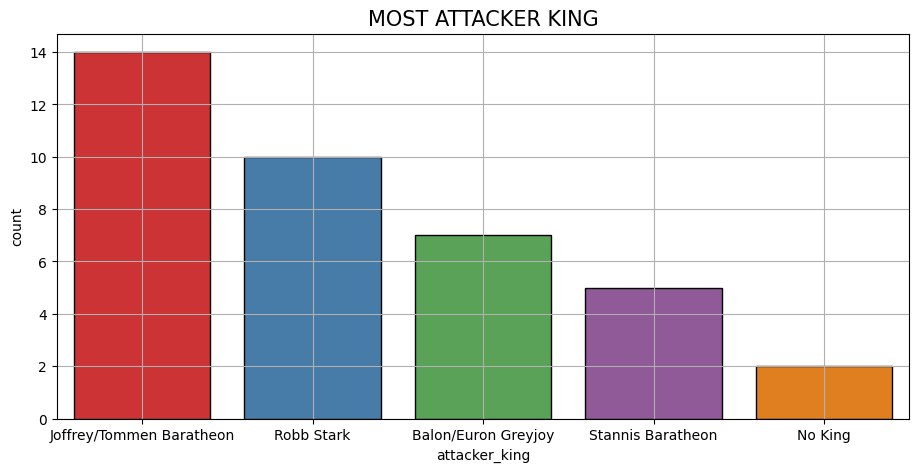

In [204]:
# Count-plot of top 5 kings who attacks the most number of times.
plt.figure(figsize=(11,5))
sns.countplot(x='attacker_king',order=battles['attacker_king'].value_counts().index[0:5],data=battles,palette = "Set1",ec='black',lw=1)
plt.title('MOST ATTACKER KING',fontsize=15)
plt.grid(True)
plt.show()

# **Which is the most battled location ?**

In [205]:
# Number of times battle happens in the particular location
battles["location"].value_counts()

,count
location,
Riverrun,4
Winterfell,3
Storm's End,2
Harrenhal,2
Darry,2
Moat Cailin,2
Deepwood Motte,2
Torrhen's Square,2
Golden Tooth,1


In [206]:
# Top 5 locations where battles takes place maximum times.
battles["location"].value_counts()[0:5]

,count
location,
Riverrun,4
Winterfell,3
Storm's End,2
Harrenhal,2
Darry,2


In [207]:
# Names of all the top 5 most battled location.
battles["location"].value_counts().index[0:5]

Index(['Riverrun', 'Winterfell', 'Storm's End', 'Harrenhal', 'Darry'], dtype='object', name='location')

<ipython-input-208-1464a7c6fa67>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='location',order=battles["location"].value_counts().index[0:5],data=battles,palette = "Set2",ec='black',lw=1)


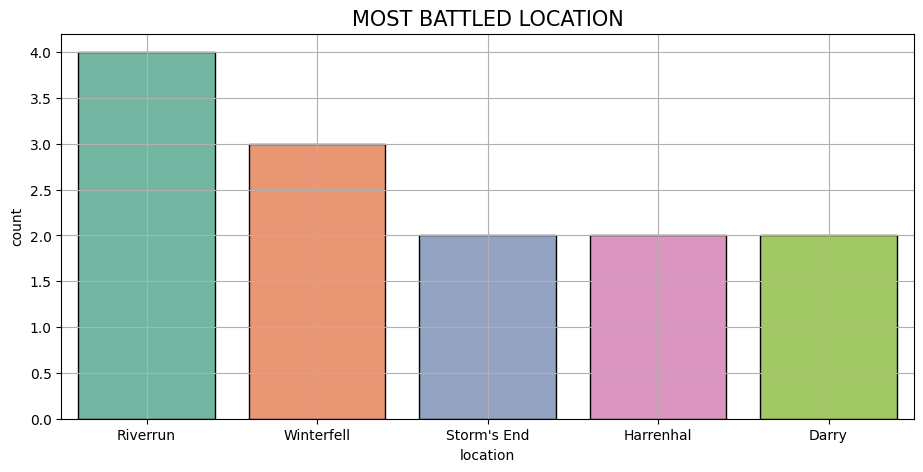

In [208]:
# Count-plot of top 5 most battled location.
plt.figure(figsize=(11,5))
sns.countplot(x='location',order=battles["location"].value_counts().index[0:5],data=battles,palette = "Set2",ec='black',lw=1)
plt.title('MOST BATTLED LOCATION',fontsize=15)
plt.grid(True)
plt.show()

# **Which king attack with the most number of attacker's army ?**

In [209]:
# Create a dataset where we have only attacker_king and attacker_size columns.
att_with_most=battles[['attacker_king','attacker_size']]
att_with_most

,attacker_king,attacker_size
0,Joffrey/Tommen Baratheon,15000
1,Joffrey/Tommen Baratheon,6280
2,Joffrey/Tommen Baratheon,15000
3,Robb Stark,18000
4,Robb Stark,1875
5,Robb Stark,6000
6,Joffrey/Tommen Baratheon,6280
7,Balon/Euron Greyjoy,6280
8,Balon/Euron Greyjoy,1000
9,Balon/Euron Greyjoy,264


In [210]:
# Sort the dataset in descending order of the attacker_size.
a=att_with_most.sort_values(by='attacker_size',ascending=False)
a

,attacker_king,attacker_size
27,Stannis Baratheon,100000
19,Stannis Baratheon,21000
16,Joffrey/Tommen Baratheon,20000
3,Robb Stark,18000
0,Joffrey/Tommen Baratheon,15000
2,Joffrey/Tommen Baratheon,15000
22,No King,6280
20,Robb Stark,6280
7,Balon/Euron Greyjoy,6280
33,Joffrey/Tommen Baratheon,6280


In [211]:
# Top 5 attacker king with most number of attcker_size army.
a=a.head()
a

,attacker_king,attacker_size
27,Stannis Baratheon,100000
19,Stannis Baratheon,21000
16,Joffrey/Tommen Baratheon,20000
3,Robb Stark,18000
0,Joffrey/Tommen Baratheon,15000


In [212]:
# Names of the top 5 attacker kings, who attacks with most number of army.
x=list(a['attacker_king'])
x

['Stannis Baratheon',
 'Stannis Baratheon',
 'Joffrey/Tommen Baratheon',
 'Robb Stark',
 'Joffrey/Tommen Baratheon']

In [213]:
# Count of top 5 attacker army.
y=list(a['attacker_size'])
y

[100000, 21000, 20000, 18000, 15000]

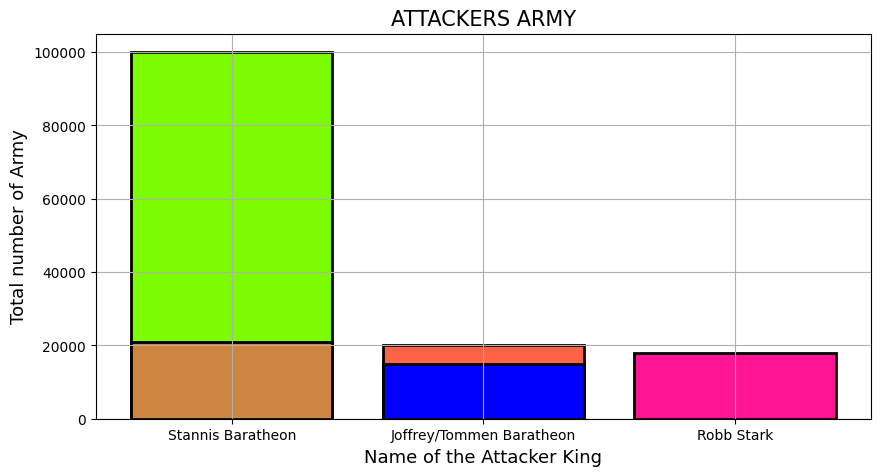

In [214]:
# Bar-plot for top 5 attacker kings, who attacks with most number of army.
plt.figure(figsize=(10,5))
plt.bar(x,y,color=['lawngreen','peru','tomato','deeppink','blue'],ec='black',lw=2)
plt.grid(True)
plt.title("ATTACKERS ARMY",fontsize=15)
plt.xlabel('Name of the Attacker King',fontsize=13)
plt.ylabel('Total number of Army',fontsize=13)
plt.show()

# **Which king has defend with the most number of army ?**

In [215]:
# Create a dataset where we have only defender_king and defender_size columns.
def_with_most=battles[['defender_king','defender_size']]
def_with_most

,defender_king,defender_size
0,Robb Stark,4000
1,Robb Stark,120
2,Robb Stark,10000
3,Joffrey/Tommen Baratheon,20000
4,Joffrey/Tommen Baratheon,6000
5,Joffrey/Tommen Baratheon,12625
6,Robb Stark,3214
7,Robb Stark,3214
8,Robb Stark,3214
9,Robb Stark,3214


In [216]:
# Sort the dataset in descending order of the defender_size.
a=def_with_most.sort_values(by='defender_size',ascending=False)
a

,defender_king,defender_size
3,Joffrey/Tommen Baratheon,20000
15,Renly Baratheon,20000
5,Joffrey/Tommen Baratheon,12625
14,Joffrey/Tommen Baratheon,10000
2,Robb Stark,10000
16,Robb Stark,10000
37,Joffrey/Tommen Baratheon,8000
19,Joffrey/Tommen Baratheon,7250
23,Robb Stark,6000
4,Joffrey/Tommen Baratheon,6000


In [217]:
# Top 5 defender king with most number of defender_size army.
a=a.head()
a

,defender_king,defender_size
3,Joffrey/Tommen Baratheon,20000
15,Renly Baratheon,20000
5,Joffrey/Tommen Baratheon,12625
14,Joffrey/Tommen Baratheon,10000
2,Robb Stark,10000


In [218]:
# Names of the top 5 defender kings, who defends with most number of army.
x=list(a['defender_king'])
x

['Joffrey/Tommen Baratheon',
 'Renly Baratheon',
 'Joffrey/Tommen Baratheon',
 'Joffrey/Tommen Baratheon',
 'Robb Stark']

In [219]:
# Count of the top 5 defender army.
y=list(a['defender_size'])
y

[20000, 20000, 12625, 10000, 10000]

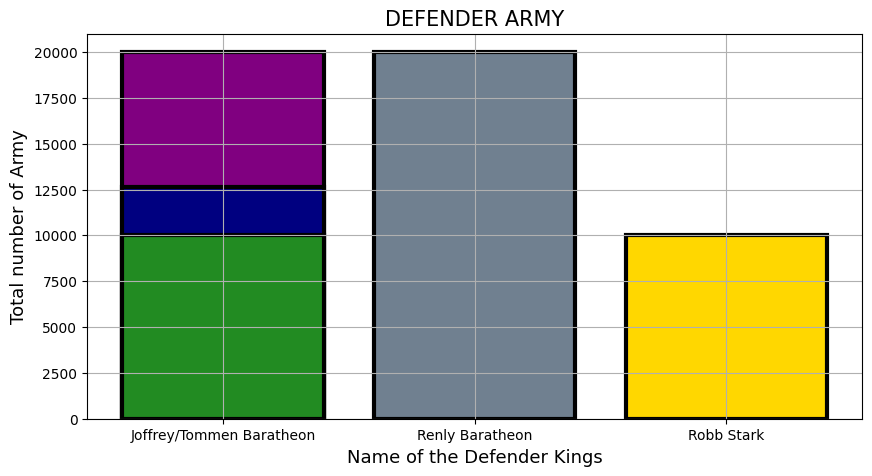

In [220]:
# Bar-plot for top 5 defender kings, who defends with most number of army.
plt.figure(figsize=(10,5))
plt.bar(x,y,color=['purple','slategray','navy','forestgreen','gold'],ec='black',lw=3)
plt.grid(True)
plt.title("DEFENDER ARMY",fontsize=15)
plt.xlabel('Name of the Defender Kings',fontsize=13)
plt.ylabel('Total number of Army',fontsize=13)
plt.show()

# **Which type of battle does attacking king face the most ?**

In [221]:
# Extract the attacker_king column.
x=battles["attacker_king"]
x

,attacker_king
0,Joffrey/Tommen Baratheon
1,Joffrey/Tommen Baratheon
2,Joffrey/Tommen Baratheon
3,Robb Stark
4,Robb Stark
5,Robb Stark
6,Joffrey/Tommen Baratheon
7,Balon/Euron Greyjoy
8,Balon/Euron Greyjoy
9,Balon/Euron Greyjoy


In [222]:
# Extract the battle_type column.
y=battles["battle_type"]
y

,battle_type
0,pitched battle
1,ambush
2,pitched battle
3,pitched battle
4,ambush
5,ambush
6,pitched battle
7,pitched battle
8,siege
9,ambush


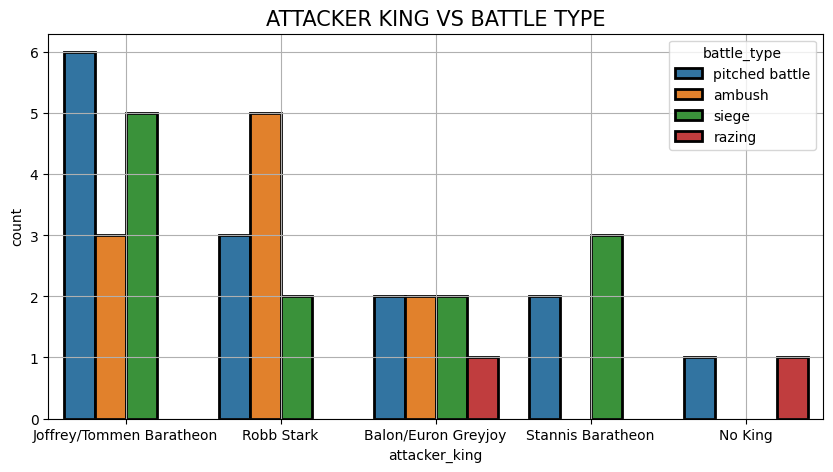

In [223]:
# Count-plot bw "attacker_king" and "battle_type"
plt.figure(figsize=(10,5))
sns.countplot(x=battles["attacker_king"],hue=y,data=battles,ec='black',lw=2)
plt.title('ATTACKER KING VS BATTLE TYPE',fontsize=15)
plt.grid(True)
plt.show()

# **Which king won most number of battles after attacking ?**

In [224]:
# Dataset about the attacker kings won the battles.
a=battles[battles['attacker_outcome']=='win']
a

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
0,Battle of the Golden Tooth,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,True,False,15000,4000,Jaime Lannister,"Clement Piper, Vance",Golden Tooth,The Westerlands
1,Battle at the Mummer's Ford,Joffrey/Tommen Baratheon,Robb Stark,win,ambush,True,False,6280,120,Gregor Clegane,Beric Dondarrion,Mummer's Ford,The Riverlands
2,Battle of Riverrun,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,False,True,15000,10000,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",Riverrun,The Riverlands
4,Battle of the Whispering Wood,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,True,True,1875,6000,"Robb Stark, Brynden Tully",Jaime Lannister,Whispering Wood,The Riverlands
5,Battle of the Camps,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,False,False,6000,12625,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",Riverrun,The Riverlands
6,Sack of Darry,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,False,False,6280,3214,Gregor Clegane,Lyman Darry,Darry,The Riverlands
7,Battle of Moat Cailin,Balon/Euron Greyjoy,Robb Stark,win,pitched battle,False,False,6280,3214,Victarion Greyjoy,No Commander,Moat Cailin,The North
8,Battle of Deepwood Motte,Balon/Euron Greyjoy,Robb Stark,win,siege,False,False,1000,3214,Asha Greyjoy,No Commander,Deepwood Motte,The North
9,Battle of the Stony Shore,Balon/Euron Greyjoy,Robb Stark,win,ambush,False,False,264,3214,Theon Greyjoy,No Commander,Stony Shore,The North
10,Battle of Torrhen's Square,Robb Stark,Balon/Euron Greyjoy,win,pitched battle,False,False,244,900,"Rodrik Cassel, Cley Cerwyn",Dagmer Cleftjaw,Torrhen's Square,The North


In [225]:
# Extract only attcker_king and attacker_outcome columns, and made it new dataset.
a=a[['attacker_king','attacker_outcome']]
a

,attacker_king,attacker_outcome
0,Joffrey/Tommen Baratheon,win
1,Joffrey/Tommen Baratheon,win
2,Joffrey/Tommen Baratheon,win
4,Robb Stark,win
5,Robb Stark,win
6,Joffrey/Tommen Baratheon,win
7,Balon/Euron Greyjoy,win
8,Balon/Euron Greyjoy,win
9,Balon/Euron Greyjoy,win
10,Robb Stark,win


In [226]:
# count of each attacking kings who won most number of battles.
a=a['attacker_king'].value_counts()
a

,count
attacker_king,
Joffrey/Tommen Baratheon,13
Robb Stark,8
Balon/Euron Greyjoy,7
Stannis Baratheon,2
No King,2


In [227]:
# Names of the attacker kings who won most number of battles
x=list(a.keys())
x

['Joffrey/Tommen Baratheon',
 'Robb Stark',
 'Balon/Euron Greyjoy',
 'Stannis Baratheon',
 'No King']

In [228]:
# Count of battles wins by top 5 attacker kings.
y=list(a)
y

[13, 8, 7, 2, 2]

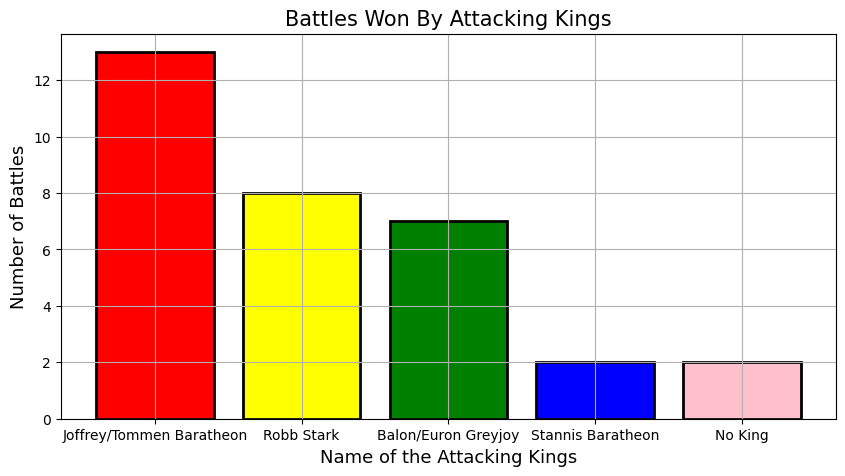

In [229]:
# Bar-plot of top 5 attacker kings who won most number of battles.
plt.figure(figsize=(10,5))
plt.bar(x,y,color=['red','yellow','green','blue','pink'],ec='black',lw=2)
plt.grid(True)
plt.title("Battles Won By Attacking Kings",fontsize=15)
plt.xlabel('Name of the Attacking Kings',fontsize=13)
plt.ylabel('Number of Battles',fontsize=13)
plt.show()

# **Which king has been attacked by other kings most number of times ?**

In [230]:
# Names and count of the kings attacked by other kings most number of times.
battles['defender_king'].value_counts()

,count
defender_king,
Robb Stark,14
Joffrey/Tommen Baratheon,13
Balon/Euron Greyjoy,4
No King,3
Stannis Baratheon,2
Renly Baratheon,1
Mance Rayder,1


In [231]:
# Names of the kings who are attacked by other kings most number of times.
x=list(battles['defender_king'].value_counts().keys())
x

['Robb Stark',
 'Joffrey/Tommen Baratheon',
 'Balon/Euron Greyjoy',
 'No King',
 'Stannis Baratheon',
 'Renly Baratheon',
 'Mance Rayder']

In [232]:
# Count of the kings who are attacked by other kings most number of times.
y=list(battles['defender_king'].value_counts())
y

[14, 13, 4, 3, 2, 1, 1]

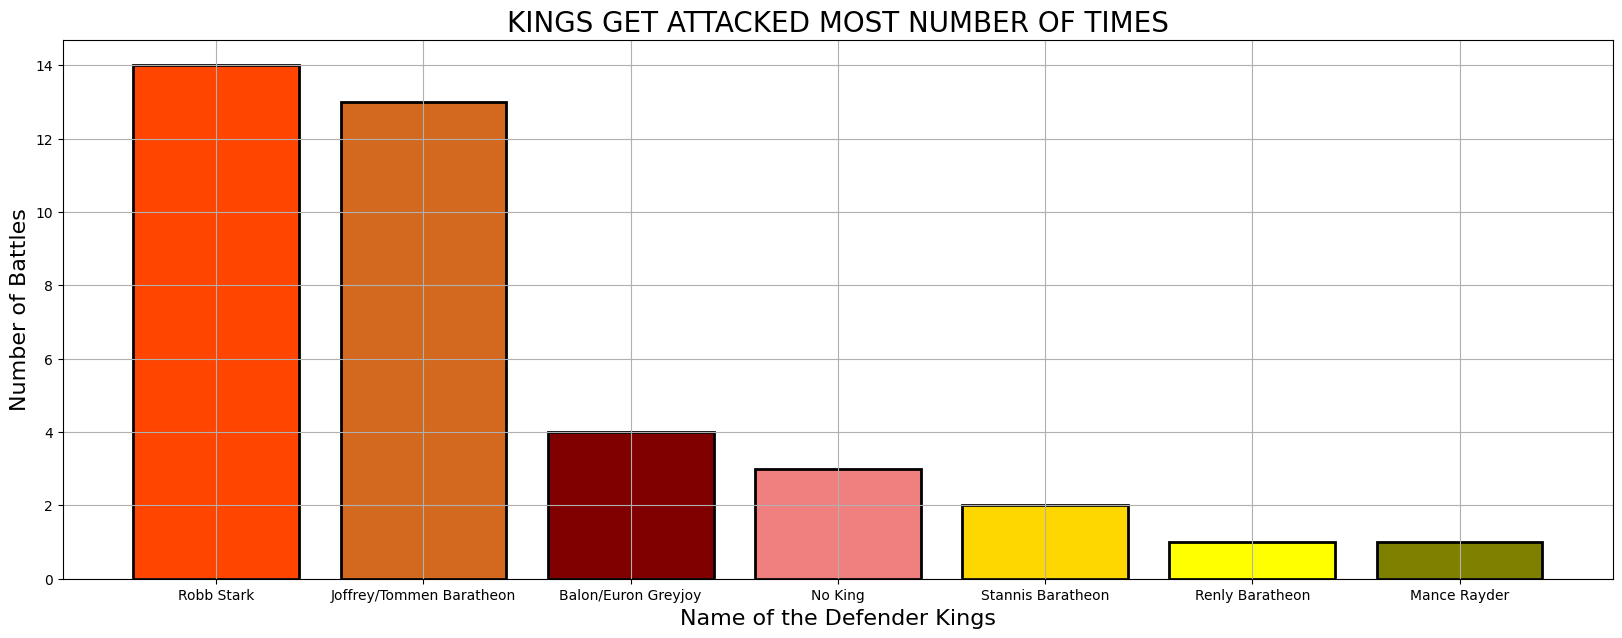

In [233]:
# Bar-plot of top 5 attacker kings who won most number of battles.
plt.figure(figsize=(20,7))
plt.bar(x,y,color=['orangered','chocolate','maroon','lightcoral','gold','yellow','olive'],ec='black',lw=2)
plt.grid(True)
plt.title("KINGS GET ATTACKED MOST NUMBER OF TIMES",fontsize=20)
plt.xlabel('Name of the Defender Kings',fontsize=16)
plt.ylabel('Number of Battles',fontsize=16)
plt.show()

# **Which king successfully defends most number of times ?**

In [234]:
# Create a dataset where defending kings get victory.
a=battles[battles['attacker_outcome']=='loss']
a

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
3,Battle of the Green Fork,Robb Stark,Joffrey/Tommen Baratheon,loss,pitched battle,True,True,18000,20000,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",Green Fork,The Riverlands
16,Battle of the Fords,Joffrey/Tommen Baratheon,Robb Stark,loss,pitched battle,False,False,20000,10000,"Tywin Lannister, Flement Brax, Gregor Clegane,...","Edmure Tully, Jason Mallister, Karyl Vance",Red Fork,The Riverlands
19,Battle of the Blackwater,Stannis Baratheon,Joffrey/Tommen Baratheon,loss,pitched battle,True,True,21000,7250,"Stannis Baratheon, Imry Florent, Guyard Morrig...","Tyrion Lannister, Jacelyn Bywater, Sandor Cleg...",King's Landing,The Crownlands
21,Battle of Duskendale,Robb Stark,Joffrey/Tommen Baratheon,loss,pitched battle,True,False,3000,3214,"Robertt Glover, Helman Tallhart","Randyll Tarly, Gregor Clegane",Duskendale,The Crownlands
27,Battle of Castle Black,Stannis Baratheon,Mance Rayder,loss,siege,True,True,100000,1240,"Mance Rayder, Tormund Giantsbane, Harma Dogshe...","Stannis Baratheon, Jon Snow, Donal Noye, Cotte...",Castle Black,Beyond the Wall
37,Siege of Winterfell,Stannis Baratheon,Joffrey/Tommen Baratheon,loss,siege,True,True,5000,8000,Stannis Baratheon,Roose Bolton,Winterfell,The North


In [235]:
# Names and count of the kings who defends successfully most number of times.
a=a['defender_king'].value_counts()
a

,count
defender_king,
Joffrey/Tommen Baratheon,4
Robb Stark,1
Mance Rayder,1


In [236]:
# Names of the kings who defends successfully most number of times.
x=list(a.keys())
x

['Joffrey/Tommen Baratheon', 'Robb Stark', 'Mance Rayder']

In [237]:
# Count of the battles of the kings who defends successfully most number of times.
y=list(a)
y

[4, 1, 1]

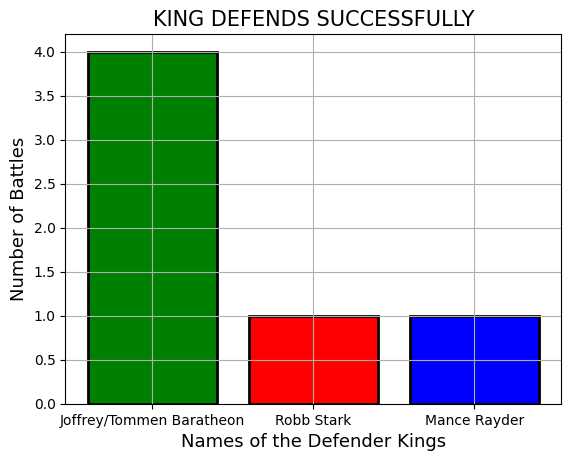

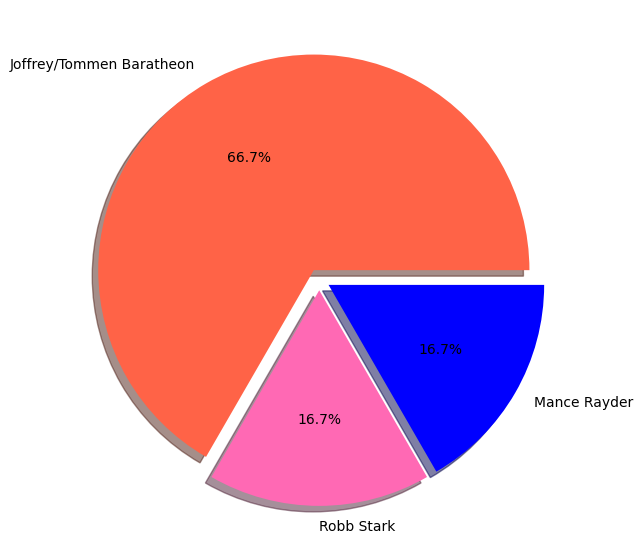

In [238]:
# Bar-plot of the kings who defends most number of times.
plt.bar(x,y,color=['green','red','blue'],ec='black',lw=2)
plt.title("KING DEFENDS SUCCESSFULLY",fontsize=15)
plt.xlabel("Names of the Defender Kings",fontsize=13)
plt.ylabel("Number of Battles",fontsize=13)
plt.grid(True)
plt.show()

# Pie-chart of the kings who defends most number of times.
plt.figure(figsize=(7,7))
myexplode = [0.05, 0.05, 0.05]
mycolors = ["#FF6347", "hotpink", "b"]
plt.pie(y,labels=x,autopct='%0.1f%%',explode = myexplode,shadow = True,colors=mycolors)
plt.show()

# **What types of battles occurs most number of times in defending successfully ?**

In [239]:
# Create a dataset where defending kings get victory.
a=battles[battles['attacker_outcome']=='loss']
a

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
3,Battle of the Green Fork,Robb Stark,Joffrey/Tommen Baratheon,loss,pitched battle,True,True,18000,20000,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",Green Fork,The Riverlands
16,Battle of the Fords,Joffrey/Tommen Baratheon,Robb Stark,loss,pitched battle,False,False,20000,10000,"Tywin Lannister, Flement Brax, Gregor Clegane,...","Edmure Tully, Jason Mallister, Karyl Vance",Red Fork,The Riverlands
19,Battle of the Blackwater,Stannis Baratheon,Joffrey/Tommen Baratheon,loss,pitched battle,True,True,21000,7250,"Stannis Baratheon, Imry Florent, Guyard Morrig...","Tyrion Lannister, Jacelyn Bywater, Sandor Cleg...",King's Landing,The Crownlands
21,Battle of Duskendale,Robb Stark,Joffrey/Tommen Baratheon,loss,pitched battle,True,False,3000,3214,"Robertt Glover, Helman Tallhart","Randyll Tarly, Gregor Clegane",Duskendale,The Crownlands
27,Battle of Castle Black,Stannis Baratheon,Mance Rayder,loss,siege,True,True,100000,1240,"Mance Rayder, Tormund Giantsbane, Harma Dogshe...","Stannis Baratheon, Jon Snow, Donal Noye, Cotte...",Castle Black,Beyond the Wall
37,Siege of Winterfell,Stannis Baratheon,Joffrey/Tommen Baratheon,loss,siege,True,True,5000,8000,Stannis Baratheon,Roose Bolton,Winterfell,The North


In [240]:
# Extract column battle_type of the a dataset.
a['battle_type']

,battle_type
3,pitched battle
16,pitched battle
19,pitched battle
21,pitched battle
27,siege
37,siege


In [241]:
# Count of the battle_type column.
a=a['battle_type'].value_counts()
a

,count
battle_type,
pitched battle,4
siege,2


In [242]:
# Names of the battle_type of successfully defending kings most number of times.
x=list(a.keys())
x

['pitched battle', 'siege']

In [243]:
# Count of the battles of successfully defending kings most number of times.
y=list(a)
y

[4, 2]

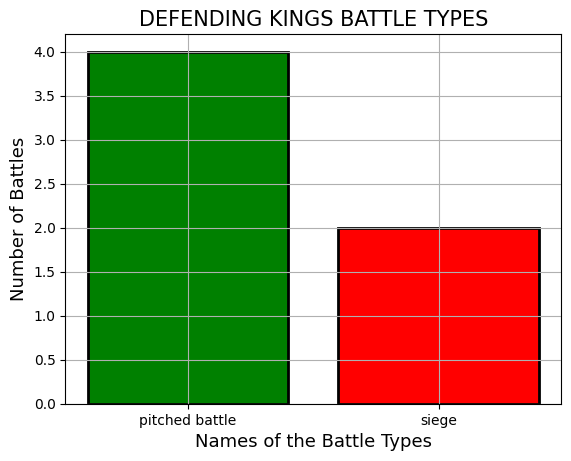

In [244]:
# Bar-plot of the type of battles in defending successfully.
plt.bar(x,y,color=['green','red','blue'],ec='black',lw=2)
plt.title("DEFENDING KINGS BATTLE TYPES",fontsize=15)
plt.xlabel("Names of the Battle Types",fontsize=13)
plt.ylabel("Number of Battles",fontsize=13)
plt.grid(True)
plt.show()

# **What is the range of attacker kings army ?**

In [245]:
# Extract attacker_size columnn of the battles dataset.
battles['attacker_size']

,attacker_size
0,15000
1,6280
2,15000
3,18000
4,1875
5,6000
6,6280
7,6280
8,1000
9,264


In [246]:
# Count of the attacker_size column.
battles['attacker_size'].value_counts()

,count
attacker_size,
6280,14
6000,3
15000,2
3000,2
5000,2
1000,1
264,1
244,1
20,1


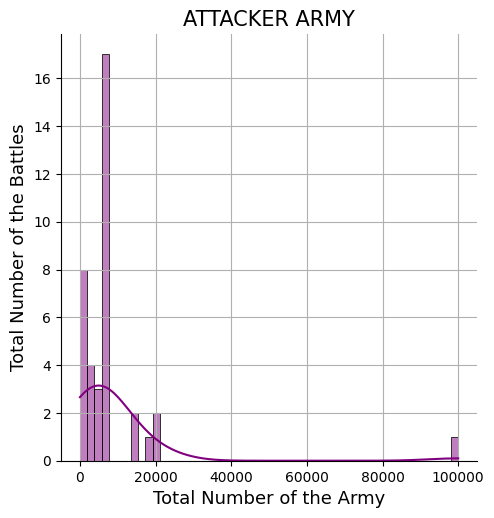

In [247]:
# Displot for the attacker_sze column of the dataset.
sns.displot(battles['attacker_size'],color="purple",kde=True)
plt.title("ATTACKER ARMY",fontsize=15)
plt.ylabel('Total Number of the Battles',fontsize=13)
plt.xlabel('Total Number of the Army',fontsize=13)
plt.grid(True)
plt.show()

# **What is the range of defender kings army ?**

In [248]:
# Extract defender_size columnn of the battles dataset.
battles['defender_size']

,defender_size
0,4000
1,120
2,10000
3,20000
4,6000
5,12625
6,3214
7,3214
8,3214
9,3214


In [249]:
# Count of the defender_size column.
battles['defender_size'].value_counts()

,count
defender_size,
3214,19
10000,3
20000,2
6000,2
200,2
4000,1
120,1
12625,1
900,1


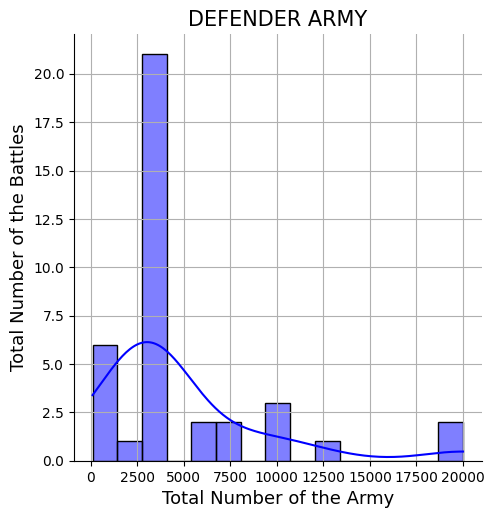

In [250]:
# Displot for the defender_sze column of the dataset.
sns.displot(battles['defender_size'],color="blue",kde=True)
plt.title("DEFENDER ARMY",fontsize=15)
plt.ylabel('Total Number of the Battles',fontsize=13)
plt.xlabel('Total Number of the Army',fontsize=13)
plt.grid(True)
plt.show()

In [251]:
# Range of most of the defender army.
(2500+5000)/2

3750.0

# **Whick king does not loss any battle both in attacking and defending case ?**

In [252]:
# Extract attacker_king column of the battle dataset.
battles['attacker_king']

,attacker_king
0,Joffrey/Tommen Baratheon
1,Joffrey/Tommen Baratheon
2,Joffrey/Tommen Baratheon
3,Robb Stark
4,Robb Stark
5,Robb Stark
6,Joffrey/Tommen Baratheon
7,Balon/Euron Greyjoy
8,Balon/Euron Greyjoy
9,Balon/Euron Greyjoy


In [253]:
# Extract attacker_outcome column of the battle dataset.
battles['attacker_outcome']

,attacker_outcome
0,win
1,win
2,win
3,loss
4,win
5,win
6,win
7,win
8,win
9,win


In [254]:
# Extract defender_king column of the battle dataset.
battles['defender_king']

,defender_king
0,Robb Stark
1,Robb Stark
2,Robb Stark
3,Joffrey/Tommen Baratheon
4,Joffrey/Tommen Baratheon
5,Joffrey/Tommen Baratheon
6,Robb Stark
7,Robb Stark
8,Robb Stark
9,Robb Stark


In [255]:
# Extract attacker_outcome column of the battle dataset.
battles['attacker_outcome']

,attacker_outcome
0,win
1,win
2,win
3,loss
4,win
5,win
6,win
7,win
8,win
9,win


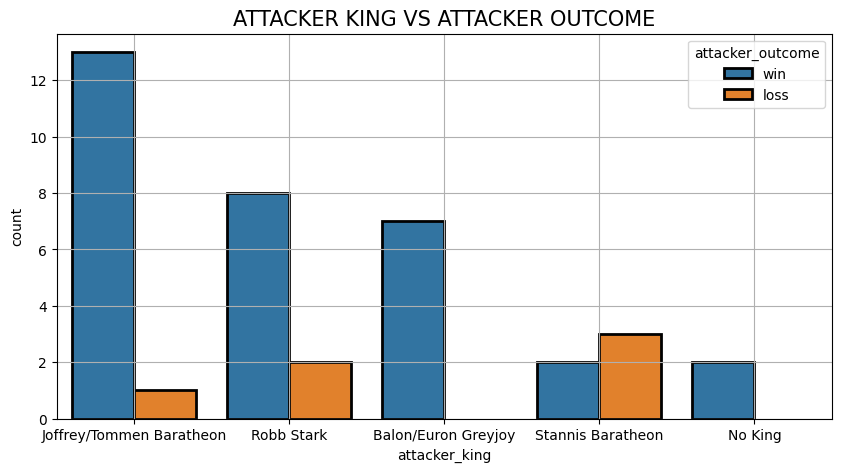

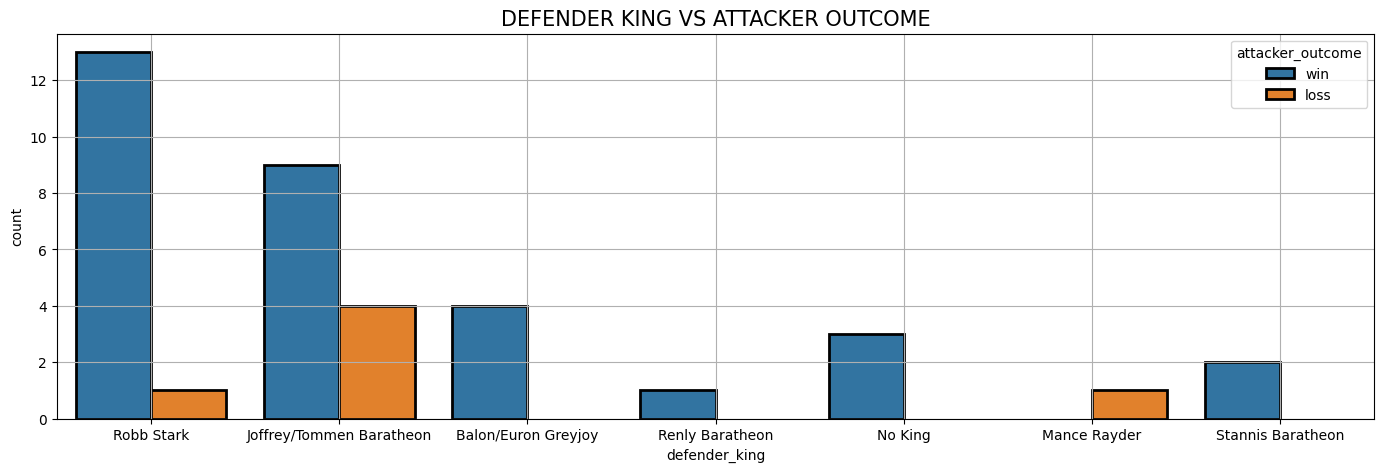

In [256]:
# Count-plot bw "attacker_king" and "attacker_outcome"
plt.figure(figsize=(10,5))
sns.countplot(x=battles["attacker_king"],hue=battles['attacker_outcome'],data=battles,ec='black',lw=2)
plt.title('ATTACKER KING VS ATTACKER OUTCOME',fontsize=15)
plt.grid(True)
plt.show()


# Count-plot bw "attacker_king" and "attacker_outcome"
plt.figure(figsize=(17,5))
sns.countplot(x=battles["defender_king"],hue=battles['attacker_outcome'],data=battles,ec='black',lw=2)
plt.title('DEFENDER KING VS ATTACKER OUTCOME',fontsize=15)
plt.grid(True)
plt.show()

# **Is there any relation between army size of the attacker king and victory in the battle ?**

In [257]:
# Create a dataset where attacker_size is greater than the defender size of the battle dataset..
a=battles[battles['attacker_size'] > battles['defender_size']]
a

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
0,Battle of the Golden Tooth,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,True,False,15000,4000,Jaime Lannister,"Clement Piper, Vance",Golden Tooth,The Westerlands
1,Battle at the Mummer's Ford,Joffrey/Tommen Baratheon,Robb Stark,win,ambush,True,False,6280,120,Gregor Clegane,Beric Dondarrion,Mummer's Ford,The Riverlands
2,Battle of Riverrun,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,False,True,15000,10000,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",Riverrun,The Riverlands
6,Sack of Darry,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,False,False,6280,3214,Gregor Clegane,Lyman Darry,Darry,The Riverlands
7,Battle of Moat Cailin,Balon/Euron Greyjoy,Robb Stark,win,pitched battle,False,False,6280,3214,Victarion Greyjoy,No Commander,Moat Cailin,The North
12,Sack of Torrhen's Square,Balon/Euron Greyjoy,Balon/Euron Greyjoy,win,siege,False,True,6280,3214,Dagmer Cleftjaw,No Commander,Torrhen's Square,The North
16,Battle of the Fords,Joffrey/Tommen Baratheon,Robb Stark,loss,pitched battle,False,False,20000,10000,"Tywin Lannister, Flement Brax, Gregor Clegane,...","Edmure Tully, Jason Mallister, Karyl Vance",Red Fork,The Riverlands
18,Battle of the Crag,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,False,False,6000,3214,"Robb Stark, Smalljon Umber, Black Walder Frey",Rolph Spicer,Crag,The Westerlands
19,Battle of the Blackwater,Stannis Baratheon,Joffrey/Tommen Baratheon,loss,pitched battle,True,True,21000,7250,"Stannis Baratheon, Imry Florent, Guyard Morrig...","Tyrion Lannister, Jacelyn Bywater, Sandor Cleg...",King's Landing,The Crownlands
20,Siege of Darry,Robb Stark,Joffrey/Tommen Baratheon,win,siege,False,False,6280,3214,Helman Tallhart,No Commander,Darry,The Riverlands


In [258]:
# Count of the attacker_outcome column of the dataset a.
a['attacker_outcome'].value_counts()

,count
attacker_outcome,
win,18
loss,3


In [259]:
# Percentage of winning the battle, if the size of the attacker army is greater than the size of the defender army.
18/21*100

85.71428571428571

In [260]:
# Count of battle wins and battle loss.
y=list(a['attacker_outcome'].value_counts())
y

[18, 3]

In [261]:
# attacker_outcome column's values of the dataset a in the list.
x=list(a['attacker_outcome'].value_counts().keys())
x

['win', 'loss']

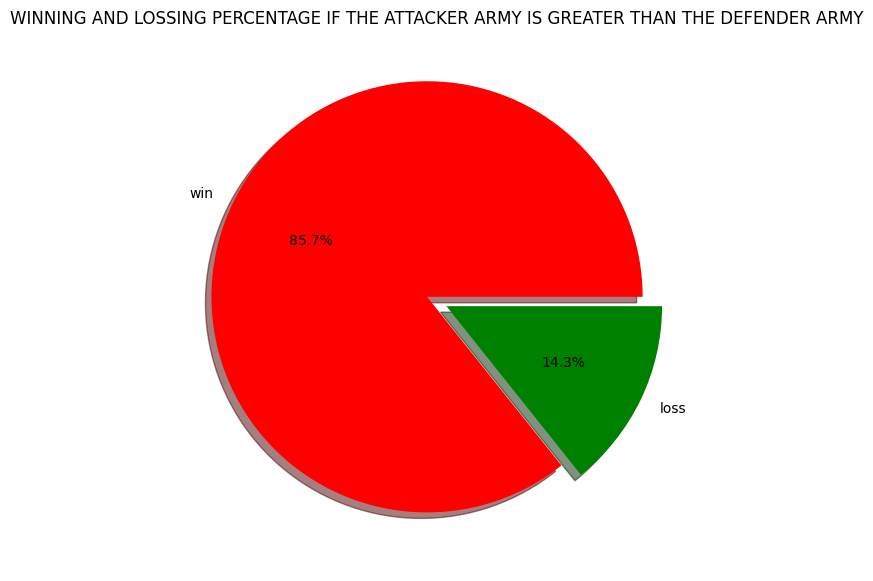

In [262]:
# Pie-chart will tells us about the percentage of winning the battle, if the size of the attacker army is greater than the size of the defender army.
plt.figure(figsize=(7,7))
myexplode = [0.05, 0.05]
mycolors = ["red", "green"]
plt.pie(y,labels=x,autopct='%0.1f%%',explode = myexplode,shadow = True,colors=mycolors)
plt.title("WINNING AND LOSSING PERCENTAGE IF THE ATTACKER ARMY IS GREATER THAN THE DEFENDER ARMY")
plt.show()

In [263]:
# Create a dataset where attacker_size is less than the defender size of the battle dataset..
a=battles[battles['attacker_size'] < battles['defender_size']]
a

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
3,Battle of the Green Fork,Robb Stark,Joffrey/Tommen Baratheon,loss,pitched battle,True,True,18000,20000,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",Green Fork,The Riverlands
4,Battle of the Whispering Wood,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,True,True,1875,6000,"Robb Stark, Brynden Tully",Jaime Lannister,Whispering Wood,The Riverlands
5,Battle of the Camps,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,False,False,6000,12625,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",Riverrun,The Riverlands
8,Battle of Deepwood Motte,Balon/Euron Greyjoy,Robb Stark,win,siege,False,False,1000,3214,Asha Greyjoy,No Commander,Deepwood Motte,The North
9,Battle of the Stony Shore,Balon/Euron Greyjoy,Robb Stark,win,ambush,False,False,264,3214,Theon Greyjoy,No Commander,Stony Shore,The North
10,Battle of Torrhen's Square,Robb Stark,Balon/Euron Greyjoy,win,pitched battle,False,False,244,900,"Rodrik Cassel, Cley Cerwyn",Dagmer Cleftjaw,Torrhen's Square,The North
11,Battle of Winterfell,Balon/Euron Greyjoy,Robb Stark,win,ambush,False,True,20,3214,Theon Greyjoy,Bran Stark,Winterfell,The North
13,Sack of Winterfell,Joffrey/Tommen Baratheon,Robb Stark,win,ambush,True,False,618,2000,"Ramsay Snow, Theon Greyjoy","Rodrik Cassel, Cley Cerwyn, Leobald Tallhart",Winterfell,The North
14,Battle of Oxcross,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,True,True,6000,10000,"Robb Stark, Brynden Tully","Stafford Lannister, Roland Crakehall, Antario ...",Oxcross,The Westerlands
15,Siege of Storm's End,Stannis Baratheon,Renly Baratheon,win,siege,True,False,5000,20000,"Stannis Baratheon, Davos Seaworth","Renly Baratheon, Cortnay Penrose, Loras Tyrell...",Storm's End,The Stormlands


In [264]:
# Count of the attacker_outcome column of the dataset a.
a['attacker_outcome'].value_counts()

,count
attacker_outcome,
win,12
loss,3


In [265]:
# Percentage of winning the battle, if the size of the attacker army is less than the size of the defender army.
12/15*100

80.0

In [266]:
# Count of Battle wins and battle loss.
y=list(a['attacker_outcome'].value_counts())
y

[12, 3]

In [267]:
# attacker_outcome column's values of the dataset a in the list.
x=list(a['attacker_outcome'].value_counts().keys())
x

['win', 'loss']

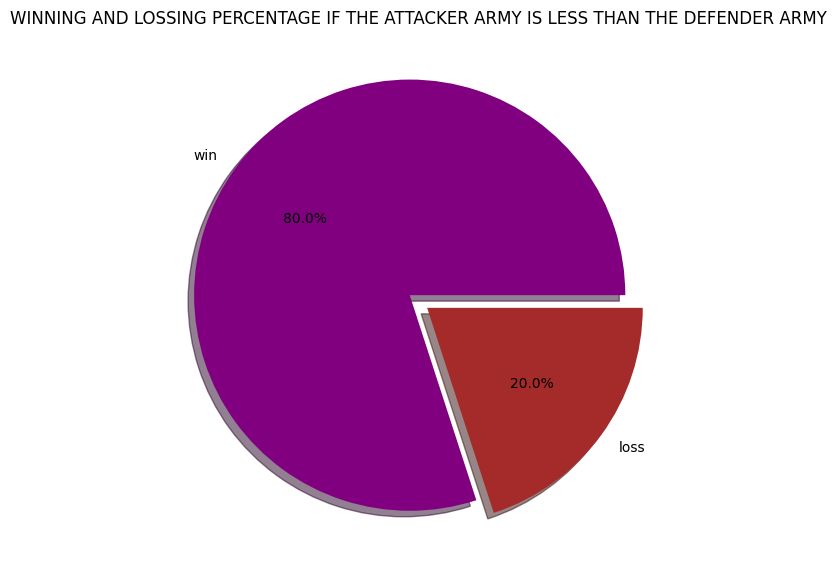

In [268]:
# Pie-chart will tells us about the percentage of winning the battle, if the size of the attacker army is less than the size of the defender army.
plt.figure(figsize=(7,7))
myexplode = [0.05, 0.05]
mycolors = ["purple", "brown"]
plt.pie(y,labels=x,autopct='%0.1f%%',explode = myexplode,shadow = True,colors=mycolors)
plt.title("WINNING AND LOSSING PERCENTAGE IF THE ATTACKER ARMY IS LESS THAN THE DEFENDER ARMY")
plt.show()

In [269]:
# Create a dataset where attacker_size is equal to the defender size of the battle dataset..
a=battles[battles['attacker_size'] == battles['defender_size']]
a

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
17,Sack of Harrenhal,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,True,False,100,100,"Roose Bolton, Vargo Hoat, Robett Glover",Amory Lorch,Harrenhal,The Riverlands
25,The Red Wedding,Joffrey/Tommen Baratheon,Robb Stark,win,ambush,True,True,3500,3500,"Walder Frey, Roose Bolton, Walder Rivers",Robb Stark,The Twins,The Riverlands


In [270]:
# Count of the attacker_outcome column of the dataset a.
a['attacker_outcome'].value_counts()

,count
attacker_outcome,
win,2


In [271]:
# Percentage of winning the battle, if the size of the attacker army is equal to the size of the defender army.
2/2*100

100.0

In [272]:
# Count of Battle wins and battle loss.
y=list(a['attacker_outcome'].value_counts())
y

[2]

In [273]:
# attacker_outcome column's values of the dataset a in the list.
x=list(a['attacker_outcome'].value_counts().keys())
x

['win']

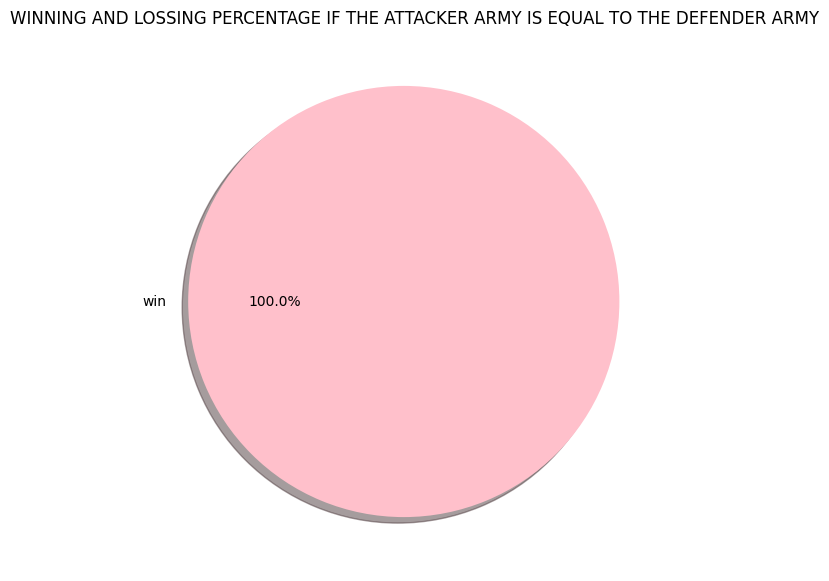

In [274]:
# Pie-chart will tells us about the percentage of winning the battle, if the size of the attacker army is equal to the size of the defender army.
plt.figure(figsize=(7,7))
myexplode = [0.05]
mycolors = ["pink"]
plt.pie(y,labels=x,autopct='%0.1f%%',explode = myexplode,shadow = True,colors=mycolors)
plt.title("WINNING AND LOSSING PERCENTAGE IF THE ATTACKER ARMY IS EQUAL TO THE DEFENDER ARMY")
plt.show()

# **In which location the attacker kings wins most number of battles ?**

In [275]:
# Make a dataset a where we have only three columns attacker_king, attacker_outcome and region from the battles dataset.
a=battles[['attacker_king','attacker_outcome','region']]
a

,attacker_king,attacker_outcome,region
0,Joffrey/Tommen Baratheon,win,The Westerlands
1,Joffrey/Tommen Baratheon,win,The Riverlands
2,Joffrey/Tommen Baratheon,win,The Riverlands
3,Robb Stark,loss,The Riverlands
4,Robb Stark,win,The Riverlands
5,Robb Stark,win,The Riverlands
6,Joffrey/Tommen Baratheon,win,The Riverlands
7,Balon/Euron Greyjoy,win,The North
8,Balon/Euron Greyjoy,win,The North
9,Balon/Euron Greyjoy,win,The North


In [276]:
# Dataset a where attacker_outcome is equal to win.
a=a[a['attacker_outcome']=='win']
a

,attacker_king,attacker_outcome,region
0,Joffrey/Tommen Baratheon,win,The Westerlands
1,Joffrey/Tommen Baratheon,win,The Riverlands
2,Joffrey/Tommen Baratheon,win,The Riverlands
4,Robb Stark,win,The Riverlands
5,Robb Stark,win,The Riverlands
6,Joffrey/Tommen Baratheon,win,The Riverlands
7,Balon/Euron Greyjoy,win,The North
8,Balon/Euron Greyjoy,win,The North
9,Balon/Euron Greyjoy,win,The North
10,Robb Stark,win,The North


In [277]:
# Count of the region column of the dataset a.
a['region'].value_counts()

,count
region,
The Riverlands,15
The North,9
The Westerlands,3
The Stormlands,3
The Reach,2


<ipython-input-278-1de23a1ecac3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region',order=a['region'].value_counts().index[0:15],data=a,palette = "Set1",ec='black',lw=2)


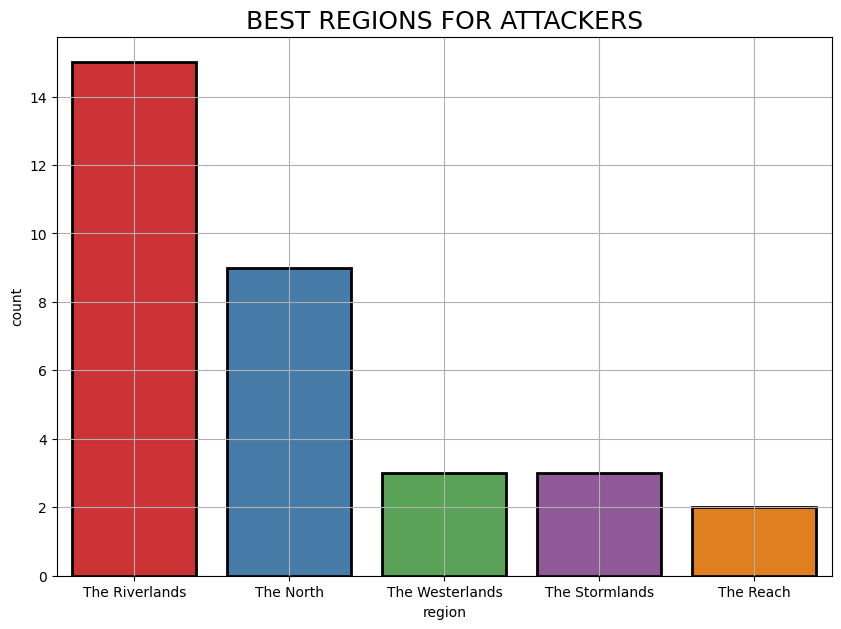

In [278]:
# Count-plot for the regions where the attacker kings wins most number of battles.
plt.figure(figsize=(10,7))
sns.countplot(x='region',order=a['region'].value_counts().index[0:15],data=a,palette = "Set1",ec='black',lw=2)
plt.title('BEST REGIONS FOR ATTACKERS',fontsize=18)
plt.grid(True)
plt.show()

# **In which location the defender kings wins most number of battles ?**

In [279]:
# Make a dataset a where we have only three columns defender_king, attacker_outcome and region from the battles dataset.
a=battles[['defender_king','attacker_outcome','region']]
a

,defender_king,attacker_outcome,region
0,Robb Stark,win,The Westerlands
1,Robb Stark,win,The Riverlands
2,Robb Stark,win,The Riverlands
3,Joffrey/Tommen Baratheon,loss,The Riverlands
4,Joffrey/Tommen Baratheon,win,The Riverlands
5,Joffrey/Tommen Baratheon,win,The Riverlands
6,Robb Stark,win,The Riverlands
7,Robb Stark,win,The North
8,Robb Stark,win,The North
9,Robb Stark,win,The North


In [280]:
# Dataset a where attacker_outcome column is equal to loss.
a=a[a['attacker_outcome']=='loss']
a

,defender_king,attacker_outcome,region
3,Joffrey/Tommen Baratheon,loss,The Riverlands
16,Robb Stark,loss,The Riverlands
19,Joffrey/Tommen Baratheon,loss,The Crownlands
21,Joffrey/Tommen Baratheon,loss,The Crownlands
27,Mance Rayder,loss,Beyond the Wall
37,Joffrey/Tommen Baratheon,loss,The North


In [281]:
# Count of the region column of the dataset a.
a['region'].value_counts()

,count
region,
The Riverlands,2
The Crownlands,2
Beyond the Wall,1
The North,1


<ipython-input-282-495459b6047a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region',order=a['region'].value_counts().index[0:15],data=a,palette = "Set2",ec='black',lw=2)


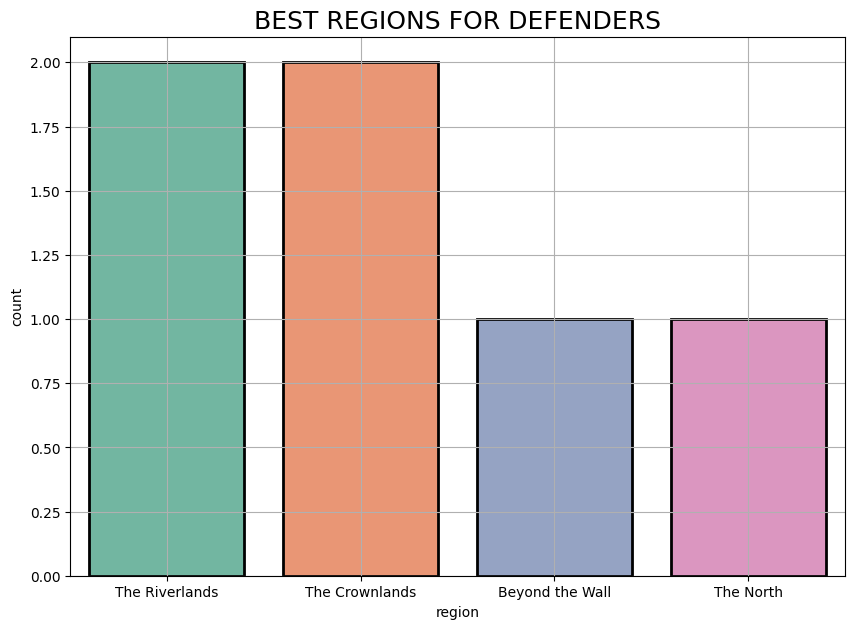

In [282]:
# Count-plot for the regions where the defender kings wins most number of battles.
plt.figure(figsize=(10,7))
sns.countplot(x='region',order=a['region'].value_counts().index[0:15],data=a,palette = "Set2",ec='black',lw=2)
plt.title('BEST REGIONS FOR DEFENDERS',fontsize=18)
plt.grid(True)
plt.show()

# **SUMMARY:**
- Joffrey/Tommen Baratheon has attack the most number of times among kings in the Game of Thrones.
- Riverrun is the most battled location.
- Stannis Baratheon among kings has attack with most number of army.
- Joffrey/Tommen Baratheon and Renly Baratheon have the most number of defender army among kings.
- Most of the battles are pitched battles of attacking kings.
- Joffrey/Tommen Baratheon won most number of battles among kings after attacking first.
- Robb Stark has been attacked by other kings most number of times.
- Joffrey/Tommen Baratheon has defends successfully most number of times.
- Among total battles in defending category, 66.7% battles has been successfullly defends by Joffrey/Tommen Baratheon.
- Most of the battles are pitched battles in case of defending case.
- Most of the attacker army of the king are of size less than 20000.
- Most of the defender army of the king are of size about 3000.
- Balon/Euron Greyjoy is the only king who does not loss any match in the case of attacking and defending both.
- If the size of the attacker army is greater than the size of the defender army then, there will be 85.71% chances of winning the battle by attacker king.
- If the size of the attacker army is less than the size of the defender army then, there will be 80% chances of winning the battle by attacker king.
- If the size of the attacker army is equal to the size of the defender army then, there will be 100% chances of winning the battle by the attacker king.
- So it is clearly visible that for winning the battle by the attacker kings, the army size of the attackers kings does not matter.
- The Riverlands is that region, where the attacker kings wins most number of battles.
- The Riverlands and The Crownlands are the regions, where the defender kings wins most number of battles.